# NPP02.02. Controlador Difuso

__Borja González Seoane, Computación Inteligente y Ética de la IA. Curso 2022-23__


In [80]:
# Edite esta constante con la distancia de Levenshtein obtenida en el primer ejercicio
DISTANCIA_LEVENSHTEIN_EJ_1 = 34

## Preámbulo

_Edite la constante anterior con la distancia de Levenshtein obtenida en el primer ejercicio de la parte práctica del examen. Condicionará la prueba a resolver._

Se empleará la librería Scikit-Fuzzy:

```sh
pip install scikit-fuzzy numpy  # También se instala NumPy
```

Recordatorio: las librerías necesarias pueden ser instaladas desde el propio _notebook_ mediante un comando _magic_ de Jupyter. Descomentar la siguiente línea:

In [81]:
%pip install scikit-fuzzy numpy

Note: you may need to restart the kernel to use updated packages.


## Enunciado

Se pretende modelar un controlador difuso para un sistema de ayuda a la conducción de un vehículo. El sistema tendrá como entradas:

- La velocidad actual del vehículo: baja, media, alta.
- La distancia a la que se encuentra el vehículo que le precede: corta, media o larga.
- La actitud de conducción del conductor: tranquila, normal o agresiva.

Los rangos de entrada para las magnitudes consideradas son:

- Velocidad: [0, 130] km/h.
- Distancia: [0, 100] % cercanía.
- Actitud: [0, 10] ratio agresividad.

La salida del sistema será la reducción de la velocidad del vehículo a aplicar ante una situación de riesgo y se pretende categorizar en tres niveles: baja, media o alta. La salida se modelará en el rango [0, 100] % de reducción de velocidad.

Los expertos han establecido las siguientes reglas para el controlador:

1. Si la velocidad es baja y la distancia es larga, entonces la reducción de velocidad es baja.
2. Si la velocidad es baja y la distancia es media, entonces la reducción de velocidad es baja.
3. Si la velocidad es baja y la distancia es corta, entonces la reducción de velocidad es media.
4. Si la velocidad es media y la distancia es larga, entonces la reducción de velocidad es baja.
5. Si la velocidad es media y la distancia es media, entonces la reducción de velocidad es media.
6. Si la velocidad es media y la distancia es corta, entonces la reducción de velocidad es alta.
7. Si la velocidad es alta y la distancia es larga, entonces la reducción de velocidad es media.
8. Si la velocidad es alta y la distancia es media, entonces la reducción de velocidad es alta.
9. Si la velocidad es alta y la distancia es corta, entonces la reducción de velocidad es alta.
10. Si la actitud es agresiva, entonces la reducción de velocidad es alta.

Los expertos se han mostrado favorables al uso de funciones de pertenencia sencillas, como las automáticas de la librería Scikit-Fuzzy, para modelar el escenario dado.

Se pide:

1. Diseñar un controlador difuso que modele el comportamiento del sistema de ayuda a la conducción.
2. Implementar el controlador difuso diseñado en Python, en este mismo _notebook_.
3. Probar el controlador difuso y obtener la inferencia desdifuminada para la configuración obtenida al ejecutar la siguiente celda de código.

In [82]:
print("Utilice la siguiente configuración para probar el controlador difuso:")
print(f"Velocidad: {round(DISTANCIA_LEVENSHTEIN_EJ_1 * 3 % 130)} km/h.")
print(f"Distancia: {DISTANCIA_LEVENSHTEIN_EJ_1* 5 % 100} % cercanía.")
print(f"Actitud: {round(DISTANCIA_LEVENSHTEIN_EJ_1 * 2 % 10)} ratio agresividad.")


Utilice la siguiente configuración para probar el controlador difuso:
Velocidad: 102 km/h.
Distancia: 70 % cercanía.
Actitud: 8 ratio agresividad.


- Puede utilizar fragmentos de código del _notebook_ N03 de la práctica PL03.
- Se valorá que las funciones empleadas tengan los nombres empleados en la enunciación (p. ej. _tranquila_, _normal_, _agresiva_) para las categorizaciones.
- Se valorá positivamente la claridad en el código y los comentarios que puedan ayudar a entender las partes más relevantes.
- Al final del _notebook_ presente una gráfica con la salida para la configuración indicada al ejecutar la celda anterior y comente brevemente su interpretación. Incluya también el valor final desdifuminado.

## Resolución

*Resuelva el ejercicio en celdas a partir de aquí...*

---

In [83]:
from typing import Tuple

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Formulación de variables y funciones de pertenencia


In [84]:
# Variables como antecendentes y consecuentes
var_velocidad = ctrl.Antecedent(np.arange(0, 131, 1), "km/h")
var_distancia = ctrl.Antecedent(np.arange(0, 101, 1), "% cercanía")
var_actitud =  ctrl.Antecedent(np.arange(0, 11, 1), "ratio agresividad")
var_reduccionVelocidad = ctrl.Consequent(np.arange(0, 101, 1), "% reducción velocidad")

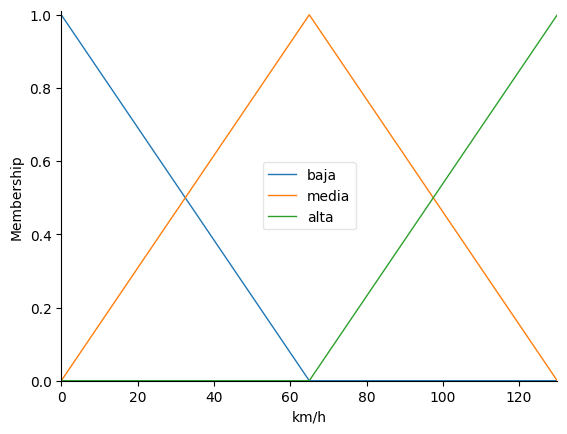

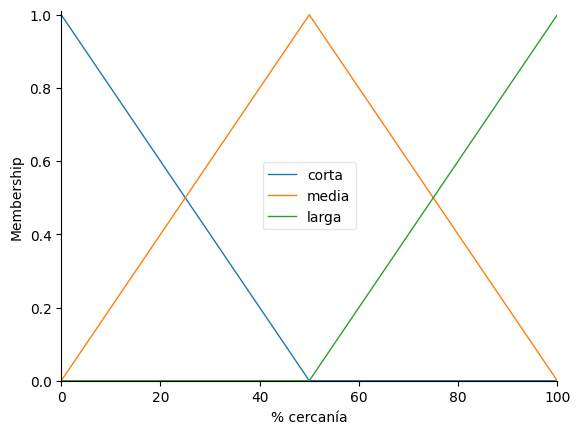

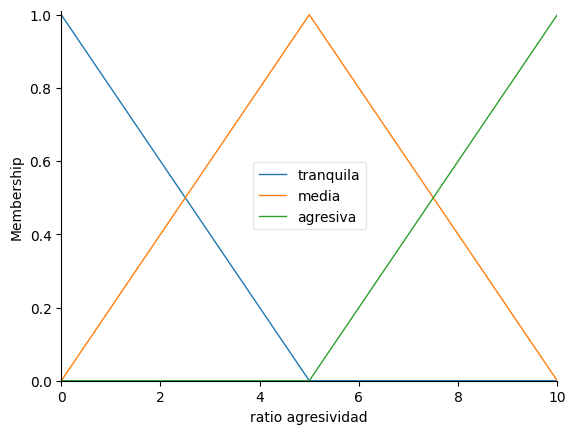

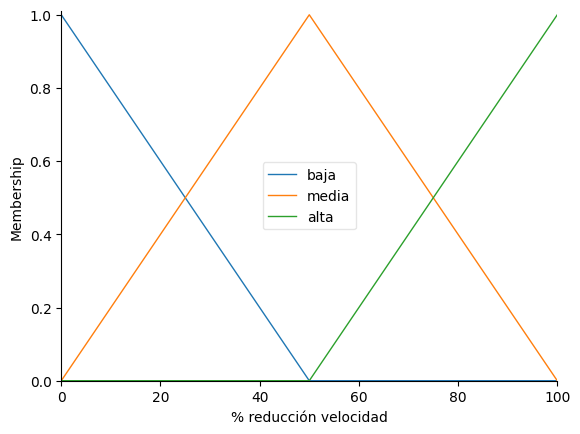

In [85]:
# Funciones de pertencia
var_velocidad.automf(3, names=["baja", "media", "alta"])
var_distancia.automf(3, names=["corta", "media", "larga"])
var_actitud.automf(3, names=["tranquila", "media", "agresiva"])
var_reduccionVelocidad.automf(3, names=["baja", "media", "alta"])

var_velocidad.view()
var_distancia.view()
var_actitud.view()
var_reduccionVelocidad.view()


In [86]:
print(var_reduccionVelocidad.defuzzify_method)

centroid


# Definicion de las reglas difusas

1. Si la velocidad es baja y la distancia es larga, entonces la reducción de velocidad es baja.
2. Si la velocidad es baja y la distancia es media, entonces la reducción de velocidad es baja.
3. Si la velocidad es baja y la distancia es corta, entonces la reducción de velocidad es media.
4. Si la velocidad es media y la distancia es larga, entonces la reducción de velocidad es baja.
5. Si la velocidad es media y la distancia es media, entonces la reducción de velocidad es media.
6. Si la velocidad es media y la distancia es corta, entonces la reducción de velocidad es alta.
7. Si la velocidad es alta y la distancia es larga, entonces la reducción de velocidad es media.
8. Si la velocidad es alta y la distancia es media, entonces la reducción de velocidad es alta.
9. Si la velocidad es alta y la distancia es corta, entonces la reducción de velocidad es alta.
10. Si la actitud es agresiva, entonces la reducción de velocidad es alta.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

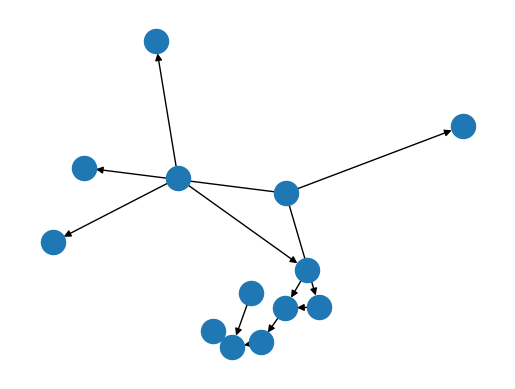

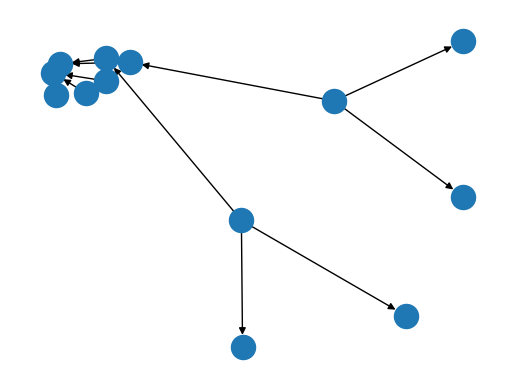

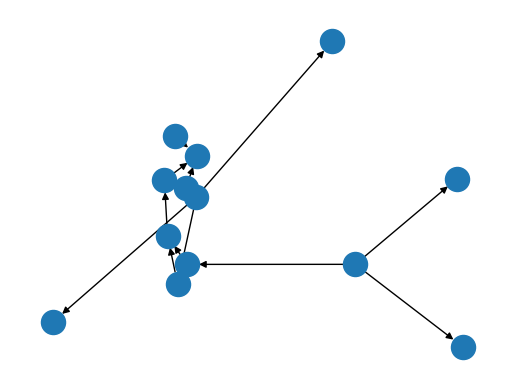

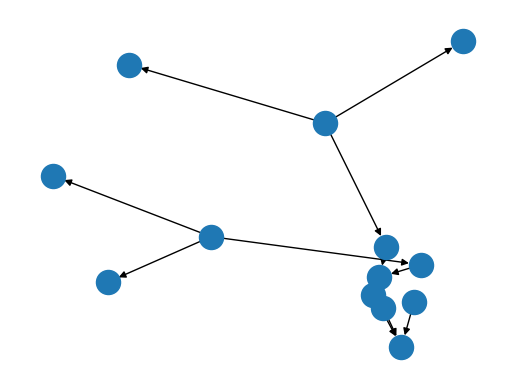

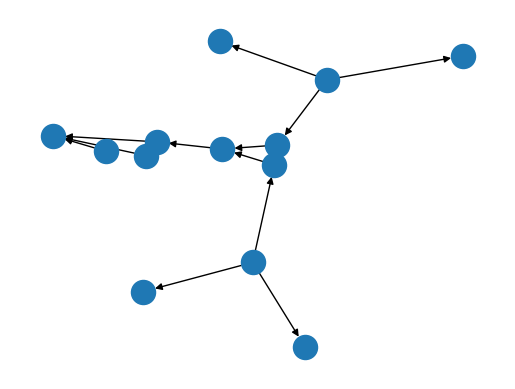

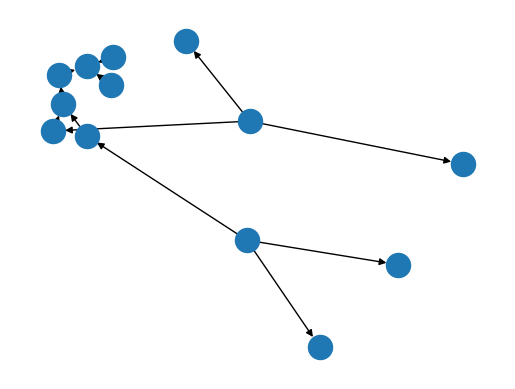

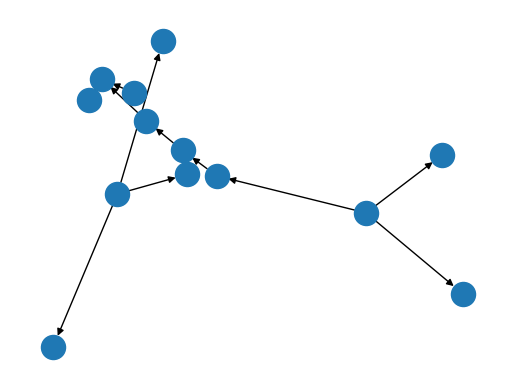

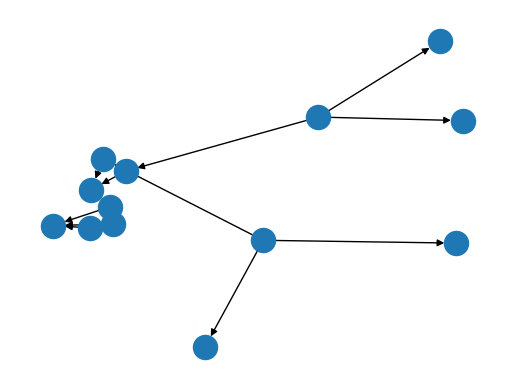

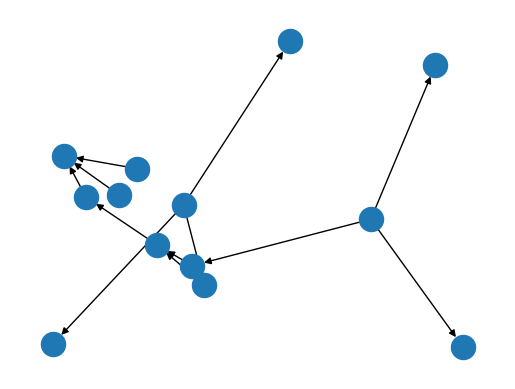

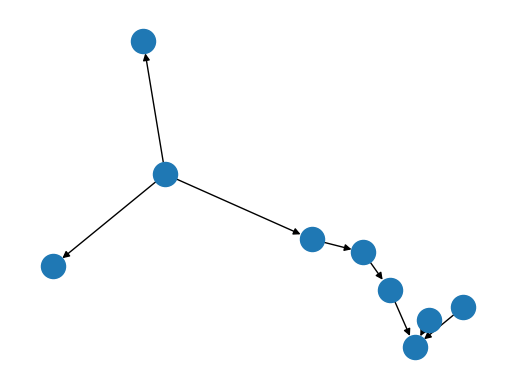

In [87]:
regla1 = ctrl.Rule(var_velocidad["baja"] & var_distancia["larga"], var_reduccionVelocidad["baja"])
regla2 = ctrl.Rule(var_velocidad["baja"] & var_distancia["media"], var_reduccionVelocidad["baja"])
regla3 = ctrl.Rule(var_velocidad["baja"] & var_distancia["corta"], var_reduccionVelocidad["media"])
regla4 = ctrl.Rule(var_velocidad["media"] & var_distancia["larga"], var_reduccionVelocidad["baja"])
regla5 = ctrl.Rule(var_velocidad["media"] & var_distancia["media"], var_reduccionVelocidad["media"])
regla6 = ctrl.Rule(var_velocidad["media"] & var_distancia["corta"], var_reduccionVelocidad["alta"])
regla7 = ctrl.Rule(var_velocidad["alta"] & var_distancia["larga"], var_reduccionVelocidad["media"])
regla8 = ctrl.Rule(var_velocidad["alta"] & var_distancia["media"], var_reduccionVelocidad["alta"])
regla9 = ctrl.Rule(var_velocidad["alta"] & var_distancia["corta"], var_reduccionVelocidad["alta"])
regla10 = ctrl.Rule(var_actitud["agresiva"], var_reduccionVelocidad["alta"]) 

regla1.view()
regla2.view()
regla3.view()
regla4.view()
regla5.view()
regla6.view()
regla7.view()
regla8.view()
regla9.view()
regla10.view()


## Controlador Difuso

In [88]:
# Definimos las reglas del controlador
motor_de_inferencias =  ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10])

Propina: 53.87


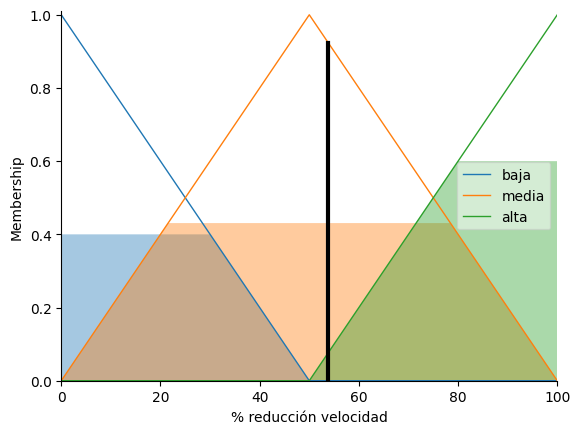

In [89]:
# Creamos el simulador
def calcula_inferencia_reduccionVelocidad(
    velocidad: float,
    distancia: float,
    actitud: float,
    mi=motor_de_inferencias
) -> Tuple[ctrl.ControlSystemSimulation, float]:
    reduccionVelocidad_infer = ctrl.ControlSystemSimulation(mi)
    reduccionVelocidad_infer.input["km/h"] = velocidad
    reduccionVelocidad_infer.input["% cercanía"] = distancia
    reduccionVelocidad_infer.input["ratio agresividad"] = actitud
    reduccionVelocidad_infer.compute()
    
    return reduccionVelocidad_infer, reduccionVelocidad_infer.output["% reducción velocidad"]

# Inferencia
infer, reduccionVelocidad = calcula_inferencia_reduccionVelocidad(velocidad=102, distancia=70, actitud=8)

print(f"Propina: {reduccionVelocidad:.2f}")
var_reduccionVelocidad.view(sim=infer)

### Probar el controlador difuso y obtener la inferencia desdifuminada para la configuración obtenida al ejecutar la siguiente celda de código.